In [2]:
# Nama : Mia Amaliah
# NIM  : 1202922002
#Tugas : Multi Linear Regression Big Data Analytic




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [3]:
# pd.read_csv = import data file nya dari dataset
#df.head (10) = jika ingin menampilkan 10 data teratas dari data frame


ht = pd.read_csv ("../input/heart-disease-uci/heart.csv")
ht.head (10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#menampilkan 10 data terbawah
ht.tail (10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#menampilkan pasien dengan data usia di atas 20 dan max 60 thn

ht2=ht[(ht['age']>20) & (ht['age']<60)]
ht2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


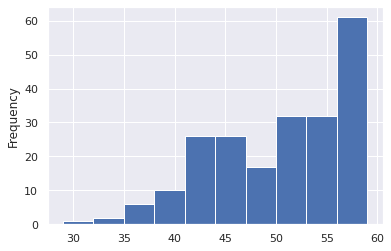

In [6]:
#menampilkan grafik untuk data usia dari >20 dan <60

#import seaborn as sns
#sns.set()

ht2.age.plot.hist(bins=10);


In [7]:
# x = men-seleksi data yang akan di tampilkan dari semua row (':') yang akan di masukan ke paramter X adalah attribute dari Age sampe Thal ("0:13")
# y = menseleksi data hanya akan menampilkan data Y pada attribute
# x = menampilkan data x
# keyword iloc = untuk menseleksi data

x= ht.iloc[:,0:13]      
y= ht.iloc [:,3]       
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
# x = men-seleksi data yang akan di tampilkan dari semua row (':') yang akan di masukan ke paramter X adalah attribute dari Age sampe Thal ("0:13")
# y = menseleksi data hanya akan menampilkan data Y berdasarkan attribut yang di pilih
# y = menampilkan data y
# keyword iloc = untuk menseleksi data

#x= ht.iloc[:,0:13]
#y= ht.iloc [:,3]
y

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64

In [9]:
#x = data
#y = target

#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size =0.1,random_state=0)
x_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [10]:
y_train

255    142
134    126
8      172
157    122
241    174
      ... 
251    132
192    120
117    120
47     138
172    120
Name: trestbps, Length: 272, dtype: int64

In [11]:
#klasifikasi data pasien
#variable untuk mesin learning klasifikasi 

#from sklearn.svm import SVC
#clf = SVC()

clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
y_predict

array([120, 120, 140, 120, 120, 120, 120, 120, 140, 140, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120])

In [18]:
#evaluasi akurasi score

#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

regr_pipe = make_pipeline(StandardScaler(), LogisticRegression ())
regr_pipe.fit (x_train, y_train);




In [19]:
print(accuracy_score(regr_pipe.predict(x_test),y_test))

NameError: name 'accuracy_score' is not defined